In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
!pip install kaggle

In [1]:
! mkdir ~/.kaggle

In [2]:
!cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/kaggle.json

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [02:19<00:00, 22.7MB/s]
100% 2.70G/2.70G [02:19<00:00, 20.8MB/s]


In [ ]:
! unzip /content/new-plant-diseases-dataset.zip

In [13]:
import os
num_classes=len(os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))
num_classes

38

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
training_set = train_datagen.flow_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    target_size=(256,256), # else 227,227 or 224,224. if none worked then 128,128
    batch_size=64,
    class_mode='categorical' )

test_set=test_datagen.flow_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    target_size=(256,256),
    batch_size=64,
    class_mode='categorical' )

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [18]:
label_map = (training_set.class_indices)

label_map

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [19]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [20]:
def display_random_images(directory, num_images=9, num_columns=3):
    subfolders = [subfolder for subfolder in os.listdir(directory) if os.path.isdir(os.path.join(directory, subfolder))]
    if len(subfolders) == 0:
        print(f"No subfolders found in {directory}")
        return

    random_subfolder = random.choice(subfolders)
    subfolder_path = os.path.join(directory, random_subfolder)
    image_files = [filename for filename in os.listdir(subfolder_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if len(image_files) < num_images:
        print(f"Number of available images in {subfolder_path} is less than {num_images}")
        return

    random_files = random.sample(image_files, num_images)
    num_rows = (num_images + num_columns - 1) // num_columns
    plt.figure(figsize=(15, 10))

    for i, filename in enumerate(random_files):
        img_path = os.path.join(subfolder_path, filename)
        img = mpimg.imread(img_path)
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename)

    plt.tight_layout()
    plt.show()

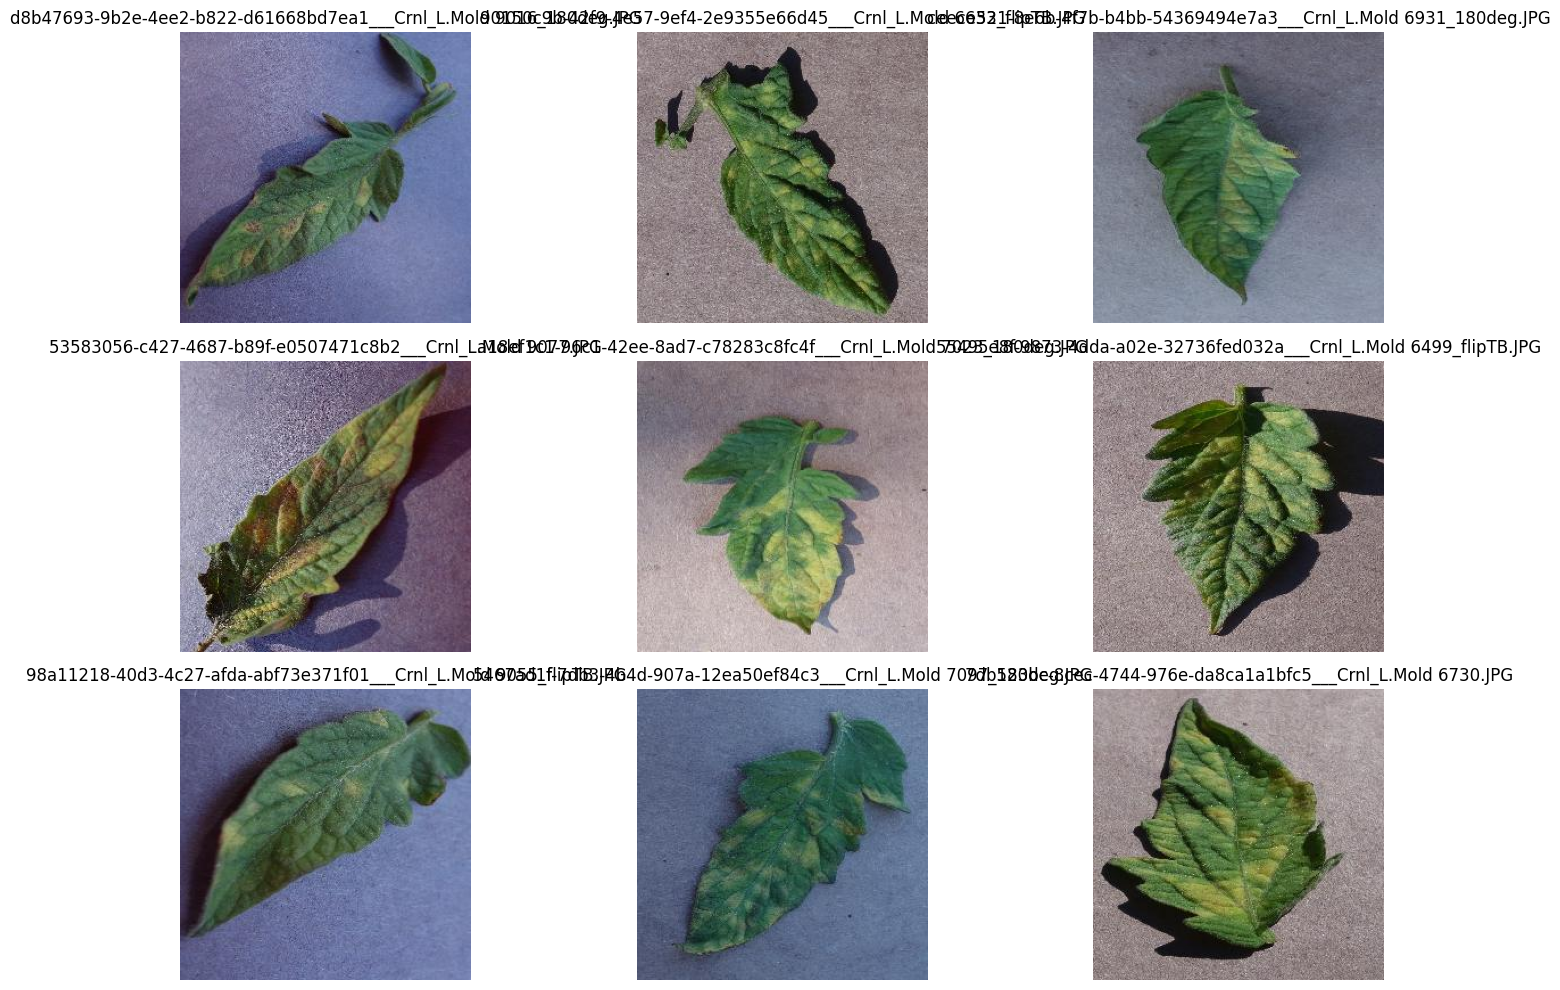

In [21]:
display_random_images('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train', num_images=9, num_columns=3)

In [22]:
display_random_images('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid', num_images=9, num_columns=3)

Output hidden; open in https://colab.research.google.com to view.

In [23]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [24]:
import numpy as np

In [25]:
images, labels = training_set.next()

len(images), len(labels), images[0].shape

(64, 64, (128, 128, 3))

In [26]:
images1, labels1 = test_set.next()
len(images1), len(labels1), images1[0].shape

(64, 64, (128, 128, 3))

In [27]:
classifier = Sequential()

In [28]:
classifier.add(Convolution2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3))) # change input_shape accordingly
classifier.add(Convolution2D(32,(3,3),activation="relu",padding="same"))
classifier.add(MaxPooling2D(3,3))

classifier.add(Convolution2D(64,(3,3),activation="relu",padding="same"))
classifier.add(Convolution2D(64,(3,3),activation="relu",padding="same"))
classifier.add(MaxPooling2D(3,3))


classifier.add(Convolution2D(128,(3,3),activation="relu",padding="same"))
classifier.add(Convolution2D(128,(3,3),activation="relu",padding="same"))
classifier.add(MaxPooling2D(3,3))

classifier.add(Convolution2D(256,(3,3),activation="relu",padding="same"))
classifier.add(Convolution2D(256,(3,3),activation="relu",padding="same"))

classifier.add(Convolution2D(512,(5,5),activation="relu",padding="same"))
classifier.add(Convolution2D(512,(5,5),activation="relu",padding="same"))

In [29]:
classifier.add(Flatten())

In [30]:
#hidden layer
classifier.add(Dense(1568, activation = 'relu'))
classifier.add(Dropout(0.5))

In [31]:
#output layer
classifier.add(Dense(num_classes, activation = 'softmax'))

In [32]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
classifier.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())
#plot_model(classifier, show_shapes=True, to_file='PlantVillage_CNN.png')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [33]:
# Train the model with EarlyStopping
history = classifier.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
)

Epoch 1/50
1099/1099 [==============================] - 455s 402ms/step - loss: 2.1705 - accuracy: 0.3715 - val_loss: 1.4193 - val_accuracy: 0.5677
Epoch 2/50
1099/1099 [==============================] - 408s 371ms/step - loss: 1.1868 - accuracy: 0.6305 - val_loss: 0.9391 - val_accuracy: 0.7038
Epoch 3/50
1099/1099 [==============================] - 423s 385ms/step - loss: 0.9398 - accuracy: 0.7046 - val_loss: 0.6792 - val_accuracy: 0.7852
Epoch 4/50
1099/1099 [==============================] - 404s 367ms/step - loss: 0.7932 - accuracy: 0.7489 - val_loss: 0.5713 - val_accuracy: 0.8090
Epoch 5/50
1099/1099 [==============================] - 407s 370ms/step - loss: 0.6988 - accuracy: 0.7790 - val_loss: 0.5764 - val_accuracy: 0.8214
Epoch 6/50
1099/1099 [==============================] - 397s 361ms/step - loss: 0.6326 - accuracy: 0.7986 - val_loss: 0.4941 - val_accuracy: 0.8345
Epoch 7/50
1099/1099 [==============================] - 397s 361ms/step - loss: 0.5902 - accuracy: 0.8132 - val_

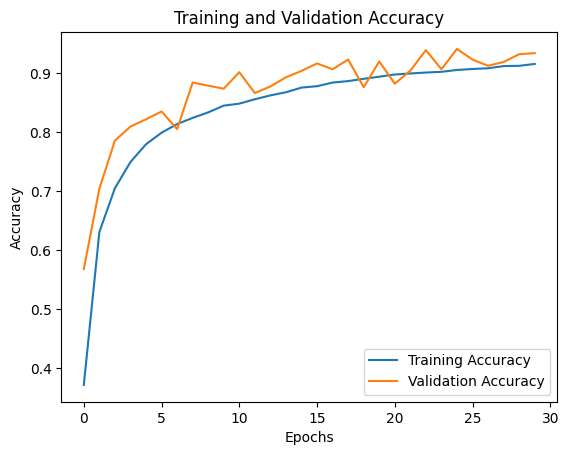

In [34]:
# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

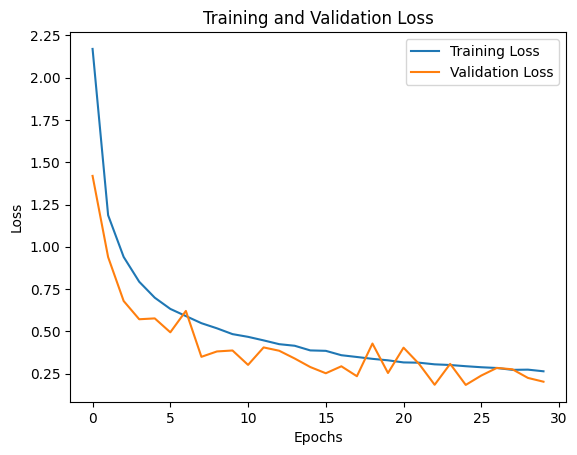

In [35]:
# Plot training and validation loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [36]:
# Make predictions on test data
test_loss, test_accuracy = classifier.evaluate(test_set, steps=len(test_set))
print(f"Test Loss: {test_loss*100:.4f} %")
print(f"Test Accuracy: {test_accuracy*100:.4f} %")

275/275 [==============================] - 25s 90ms/step - loss: 0.1829 - accuracy: 0.9404
Test Loss: 18.2866 %
Test Accuracy: 94.0417 %


In [39]:
# Save the trained model
classifier.save("CNN_model_new.h5")
print("Trained model saved as 'CNN_model_new.h5'")

Trained model saved as 'CNN_model_1_vipool.h5'


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import keras
import numpy as np
import seaborn as sns
# Load the saved model
loaded_model = tf.keras.models.load_model("CNN_model_new.h5")

In [42]:
# Initialize variables
num_samples = len(test_set.filenames)
batch_size = 32
num_batches = int(np.ceil(num_samples / batch_size))
all_test_labels = []
all_predicted_labels = []

In [ ]:
# Generate predictions in batches
for _ in range(num_batches):
    batch_images, batch_labels = next(test_set)
    batch_predictions = loaded_model.predict(batch_images)
    batch_predicted_labels = np.argmax(batch_predictions, axis=1)

    all_test_labels.extend(np.argmax(batch_labels, axis=1))
    all_predicted_labels.extend(batch_predicted_labels)

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

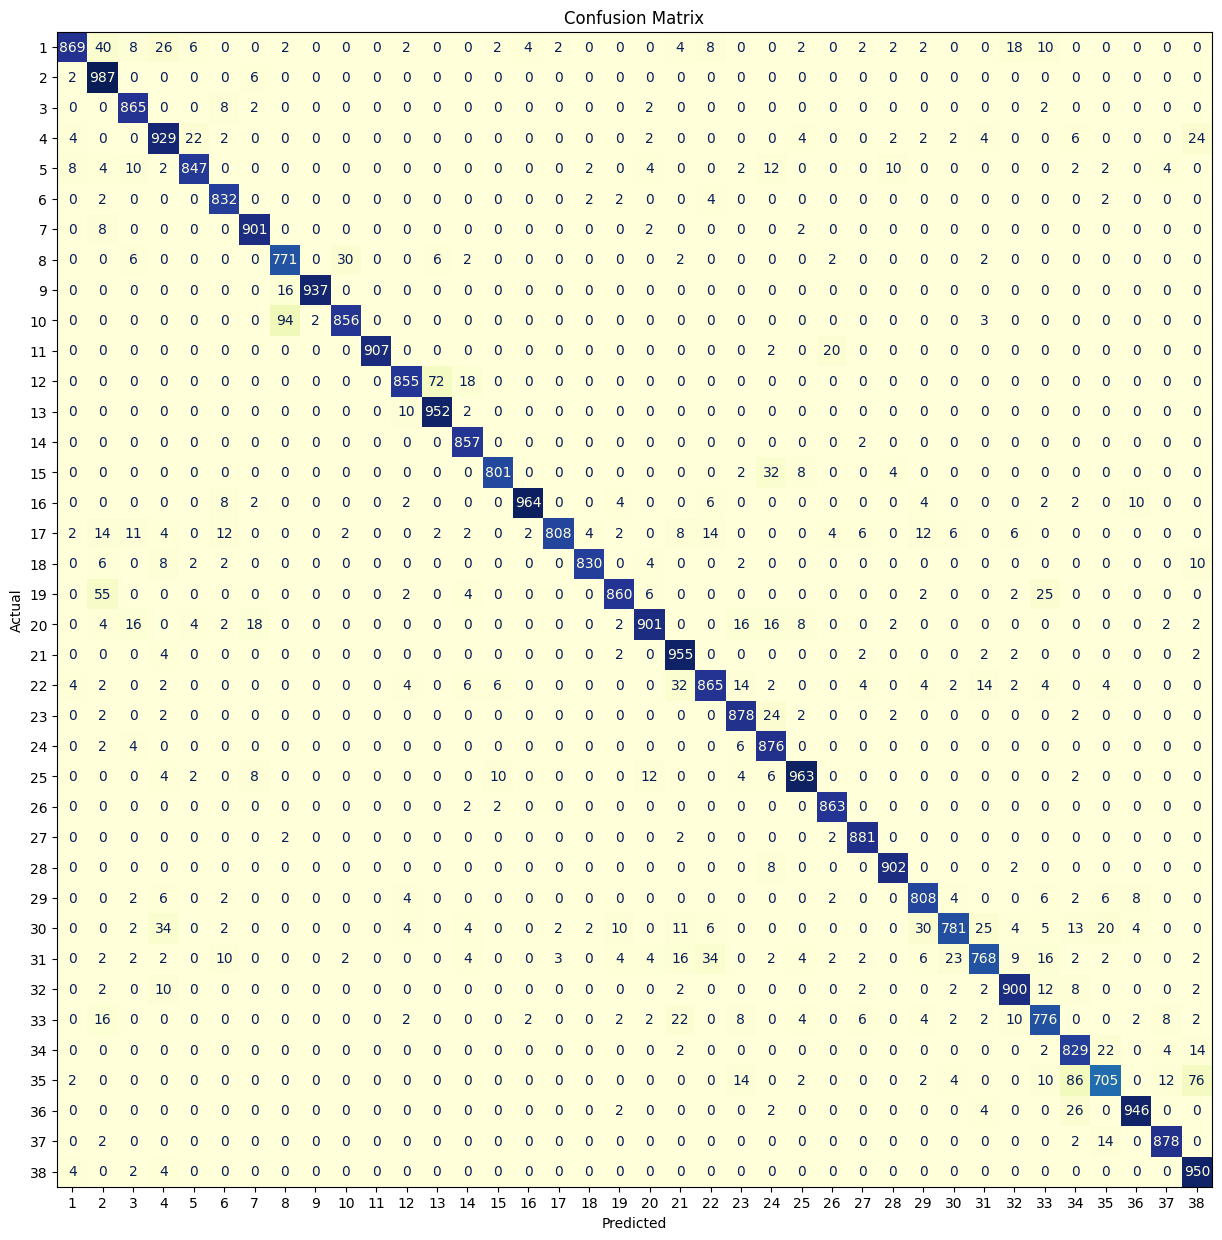

In [47]:
# Generate confusion matrix
cm = confusion_matrix(all_test_labels, all_predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
images, labels = training_set.next()

len(images), len(labels), images[0].shape

(64, 64, (128, 128, 3))

In [49]:
images1, labels1 = test_set.next()

len(images1), len(labels1), images1[0].shape

(64, 64, (128, 128, 3))

In [55]:
label_map

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [56]:
labels=list(label_map)
labels

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

In [51]:
def preprocess_images(path):
    img = image.load_img(path, target_size=(128,128))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_array / 255.0

    return img_preprocessed

In [60]:
def predict(img_path,labels):
  t=cv2.imread(img_path)
  plt.imshow(t)

  img = preprocess_images(img_path)
  prediction = loaded_model.predict(img)

  predicted_class_index = np.argmax(prediction)

  class_labels = labels

  predicted_class_label = class_labels[predicted_class_index]

  print("Predicted class    :   ", predicted_class_label)

In [61]:
import cv2

1/1 [==============================] - 0s 38ms/step
Predicted class    :    Apple___Cedar_apple_rust


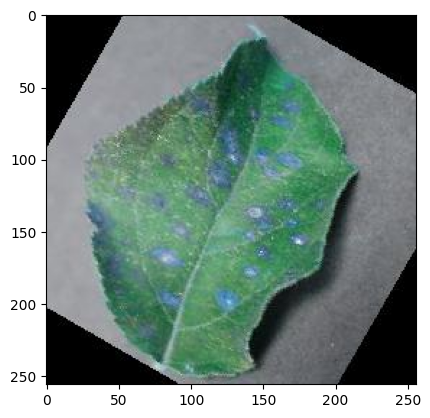

In [65]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust/31cd0e16-01aa-442a-af4d-1162ac8a7b81___FREC_C.Rust 9889_new30degFlipLR.JPG"
predict(img_path,labels)

1/1 [==============================] - 0s 35ms/step
Predicted class    :    Corn_(maize)___Northern_Leaf_Blight


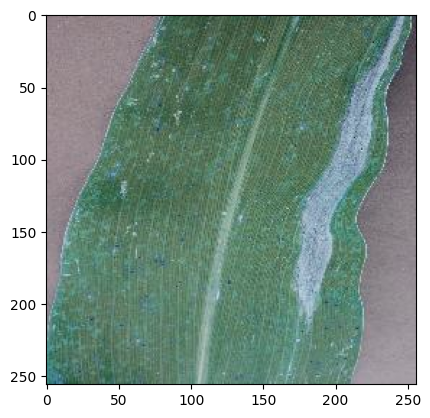

In [67]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Northern_Leaf_Blight/0fcc66f2-db0d-4b65-95df-a2e9c6d8f395___RS_NLB 4049.JPG"
predict(img_path,labels)

1/1 [==============================] - 0s 64ms/step
Predicted class    :    Grape___Esca_(Black_Measles)


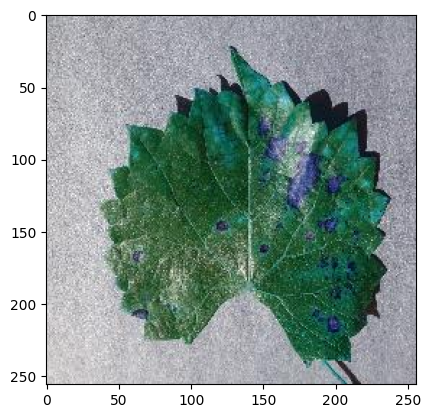

In [68]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Esca_(Black_Measles)/68c494f0-3238-4210-96c2-cec0c87ad150___FAM_B.Msls 4492.JPG"
predict(img_path,labels)

1/1 [==============================] - 0s 23ms/step
Predicted class    :    Apple___Black_rot


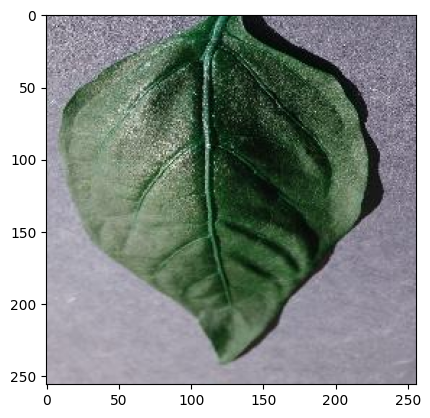

In [69]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Pepper,_bell___healthy/5a8eff54-8e99-4fcc-a603-643391d4aa6e___JR_HL 8116_flipTB.JPG"
predict(img_path,labels)
# wrong prediction

1/1 [==============================] - 0s 85ms/step
Predicted class    :    Pepper,_bell___healthy


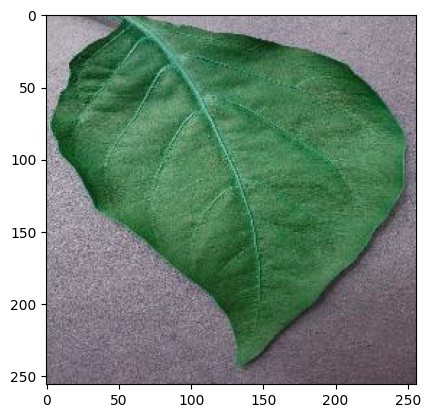

In [74]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Pepper,_bell___healthy/3e3596ca-16dd-4ccb-883d-0b777fd7a645___JR_HL 8592_flipTB.JPG"
predict(img_path,labels)

1/1 [==============================] - 0s 42ms/step
Predicted class    :    Blueberry___healthy


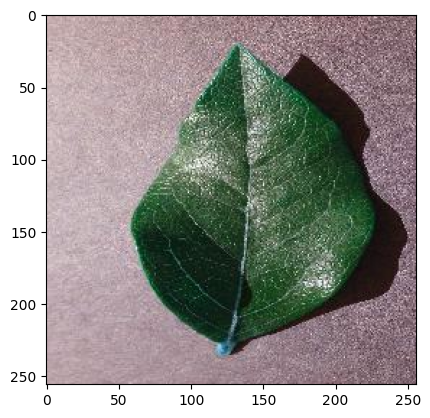

In [70]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Blueberry___healthy/461099d3-3abb-4983-b34e-8b7366ae327b___RS_HL 5109.JPG"
predict(img_path,labels)

1/1 [==============================] - 0s 37ms/step
Predicted class    :    Cherry_(including_sour)___Powdery_mildew


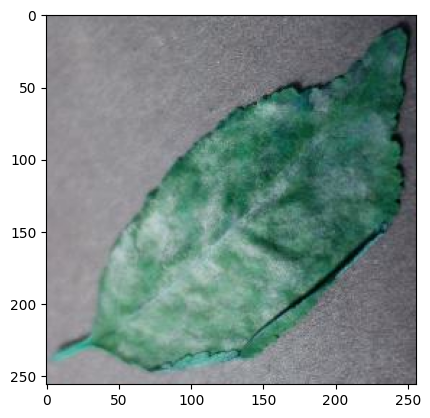

In [71]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___Powdery_mildew/4e716573-bcb1-4c3c-97c3-3d4062f893b4___FREC_Pwd.M 4652_flipLR.JPG"
predict(img_path,labels)

1/1 [==============================] - 0s 75ms/step
Predicted class    :    Orange___Haunglongbing_(Citrus_greening)


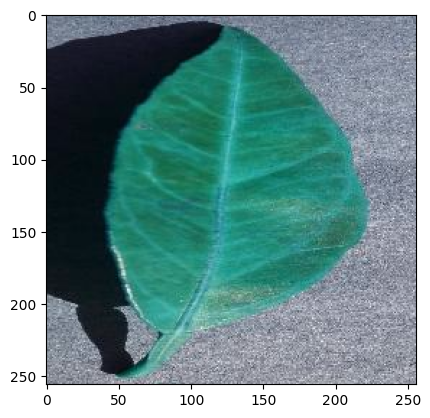

In [72]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Orange___Haunglongbing_(Citrus_greening)/c23870d1-31a1-4ed0-89f7-56f0a23f8e60___CREC_HLB 7040.JPG"
predict(img_path,labels)

1/1 [==============================] - 0s 40ms/step
Predicted class    :    Raspberry___healthy


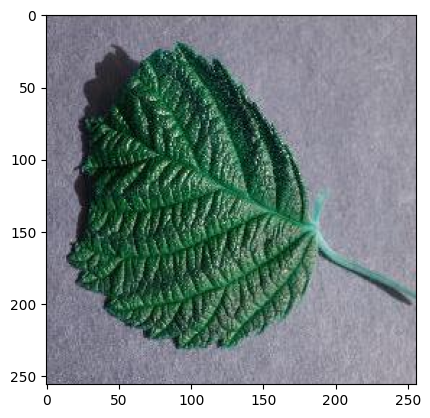

In [62]:
img_path = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Raspberry___healthy/00a3fc0e-64cc-4e35-ac2f-aef04fda9b22___Mary_HL 9177_90deg.JPG"
predict(img_path,labels)

1/1 [==============================] - 0s 20ms/step
Predicted class    :    Peach___Bacterial_spot


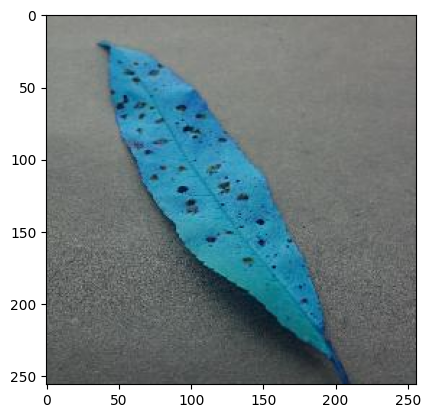

In [73]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___Bacterial_spot/1963a75b-0456-4e13-a88e-22c5d62aa866___Rutg._Bact.S 1894.JPG"
predict(img_path,labels)

1/1 [==============================] - 0s 37ms/step
Predicted class    :    Potato___Early_blight


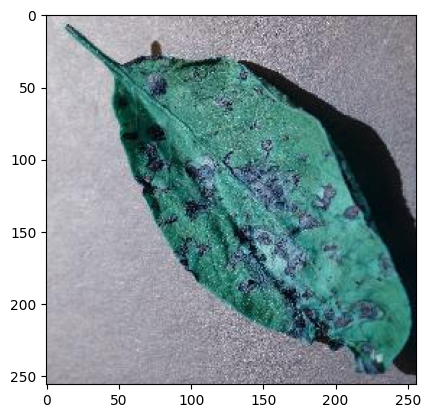

In [75]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Early_blight/95d42b98-1945-4cb3-ab27-0dbd56def41b___RS_Early.B 8866_180deg.JPG"
predict(img_path,labels)

1/1 [==============================] - 0s 28ms/step
Predicted class    :    Tomato___Early_blight


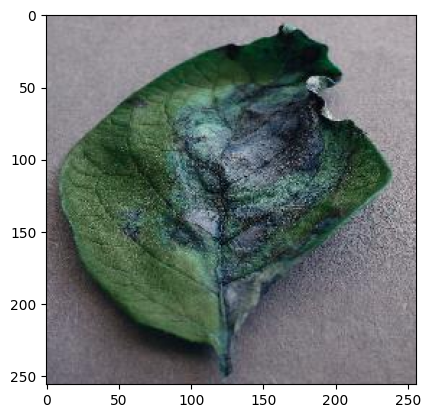

In [76]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Late_blight/0c2628d4-8d64-48a9-a157-19a9c902e304___RS_LB 4590.JPG"
predict(img_path,labels)
# wrong prediction

1/1 [==============================] - 0s 24ms/step
Predicted class    :    Potato___Late_blight


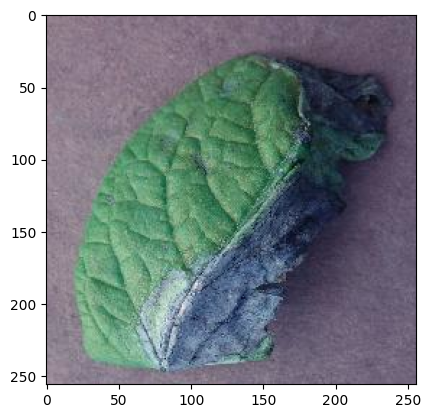

In [77]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Late_blight/27f1b297-f65a-458f-80d9-0046fa4c8c11___RS_LB 4332.JPG"
predict(img_path,labels)

1/1 [==============================] - 0s 74ms/step
Predicted class    :    Soybean___healthy


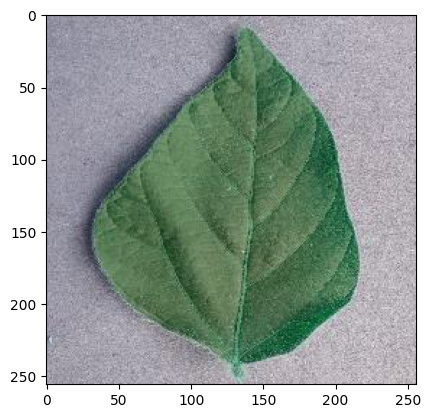

In [78]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Soybean___healthy/99975426-dafd-434e-b93b-1ffe9dde3c14___RS_HL 4866.JPG"
predict(img_path,labels)

1/1 [==============================] - 0s 71ms/step
Predicted class    :    Squash___Powdery_mildew


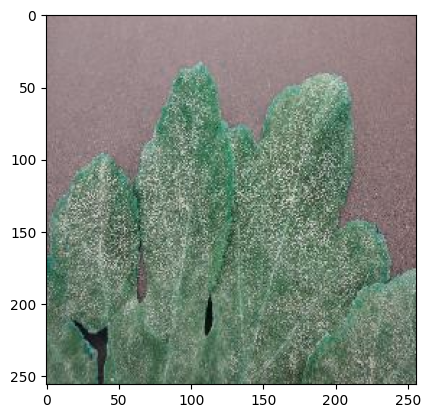

In [79]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Squash___Powdery_mildew/654112ba-8626-4a07-9bf9-7998e0d18e62___MD_Powd.M 0556.JPG"
predict(img_path,labels)

1/1 [==============================] - 0s 19ms/step
Predicted class    :    Strawberry___Leaf_scorch


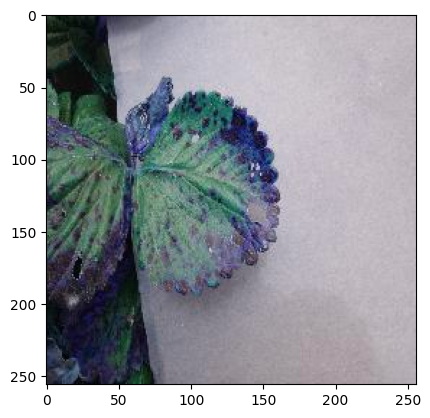

In [80]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch/242657d2-7e24-4016-b837-10e7f905f02e___RS_L.Scorch 9998.JPG"
predict(img_path,labels)

1/1 [==============================] - 0s 43ms/step
Predicted class    :    Tomato___Leaf_Mold


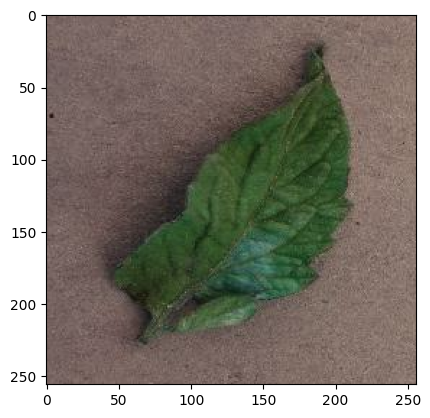

In [81]:
img_path="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold/74cb417c-24ca-43b2-897a-8c310636ac22___Crnl_L.Mold 7149.JPG"
predict(img_path,labels)